# HW2

## GENERAL INSTRUCTIONS:

- CLEARLY mark where you are answering each question (all questions must be answered in Markdown cells, NOT as comments in code cells)
- Show all code necessary for the analysis, but remove superfluous code

---

Use the [Loan Dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW2.csv) on GitHub to build the classification models described below.

## Variable Descriptions:
- `age`: age in years of person.
- `had_cancer`: 0 if the person has NOT had cancer or has cancer, 1 if they have.
- `gender_id`: `Male`, `Female`, `Non-Binary`, or `Survey Choices Do Not Accurately Reflect My Identity`.
- `income_in_k`: income in thousands of dollars.
- `state`: state person lives in.
- `credit_score`: credit score.
- `num_credit_sources`: number of sources of credit (includes credit cards, loans, car payments...etc).
- `utilization_rate`: the % of a person's total credit they use on average each month. For example if you have 10,000 dollars in available credit, and use 2,000 your utilization rate would be 0.2 (20%).
- `gave_loan`: whether or not the person got a loan.

## Instructions
1. *Build a KNN, Decision Tree, AND Logistic Regression model to predict whether or not someone got a loan (total of 3 models).*
    - If a variable/predictor has more than 2 categories, use `get_dummies()` to convert them into dummy variables (don't forget to remove the original column when training!).
    - use KFold with 5 folds (use the same KF loop to fit all three models)
    - Z-score your continuous variables only (interval data like age...etc can be counted as continuous)
    - For KNN, include only *continuous/interval* columns as predictors. For Decision Tree and Logistic Regression use ALL columns (other than `gave_loan`).
    - For KNN, choose K by using grid search.
    - For Decision Trees, set the `max_depth` if overfitting.
    - Record the Train/Test accuracies, and print out confusion matrices.
    
    
2. *Evaluate Your Models (ANSWER IN MARKDOWN CELL)*
    - A) Using accuracy and confusion matrices, **which model did best, how can you tell?**
    - B) **Are there differences in how well each model does for different gender IDs?**
    - C) **Are your models better at predicting people who got loans, or didn't get loans? How can you tell?**

In [11]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

In [12]:
# data 

data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW2.csv")
data.head()

,age,had_cancer,gender_id,income_in_k,state,credit_score,num_credit_sources,utilization_rate,gave_loan
0,39,0,Female,54,TX,448,4,0.32,0
1,43,0,Female,66,NJ,399,4,0.35,0
2,42,0,Male,50,NE,509,8,0.23,0
3,46,0,Female,79,TX,540,6,0.15,0
4,43,0,Female,49,NV,485,10,0.20,0


In [13]:
# KNN Model

predictors = ['age', 'income_in_k', 'credit_score', 'num_credit_sources', 
              'utilization_rate']
X = data[predictors]
y = data["gave_loan"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# create model
knn = KNeighborsClassifier()

# choose potential values of k
ks = {"n_neighbors": range(1,30)}

#standardize the variables
z = StandardScaler()
z.fit(X_train)
Xz_train = z.transform(X_train)
Xz_test = z.transform(X_test)

# use grid search to find best parameters
grid = GridSearchCV(knn,ks, scoring = "accuracy", cv = 5)

#run the model validation for us and be the best fit model already
knnModel = grid.fit(Xz_train, y_train)

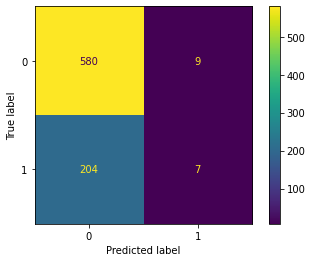

In [14]:
plot_confusion_matrix(knnModel, Xz_test, y_test)

In [15]:
#from your best model, get your best parameters (value of k)
print("KNN K-value: " + str(knnModel.best_estimator_.get_params()["n_neighbors"]))

# highest accuracy pulled from the model
print("KNN Model Best Score: " + str(knnModel.best_score_))

#how well does our model do on unseen data
print("KNN performance on unseen data: " + str(knnModel.score(X_test,y_test)))

KNN K-value: 28
KNN Model Best Score: 0.73125
KNN performance on unseen data: 0.735


In [16]:
# Convert dummy variables# 1. Build your Models
dummies = pd.get_dummies(data[["gender_id", "state"]])

# add variables back into the data frame
data = pd.concat([data, dummies], axis=1)

In [17]:
# Logistic Regression

predictors = ['age', 'had_cancer', 'income_in_k','credit_score', 
              'num_credit_sources', 'utilization_rate', 'gender_id_Female',
              'gender_id_Male', 'gender_id_Non-Binary', 
              'gender_id_Survey Choices Do Not Accurately Reflect My Identity',
              'state_TX', 'state_NJ', 'state_NE', 'state_NV', 'state_IA',
              'state_AL', 'state_WA', 'state_WV', 'state_CA', 'state_LA',
              'state_NY', 'state_GA', 'state_WI', 'state_MO', 'state_OR',
              'state_NM', 'state_MA', 'state_KS', 'state_MD', 'state_UT',
              'state_NH', 'state_AK', 'state_IL', 'state_SD', 'state_FL',
              'state_DE', 'state_MS', 'state_RI', 'state_ME', 'state_SC',
              'state_AR', 'state_ND', 'state_MI', 'state_CO', 'state_MN',
              'state_MT', 'state_AZ', 'state_PA', 'state_HI', 'state_TN',
              'state_ID', 'state_KY', 'state_NC', 'state_CT', 'state_OH',
              'state_WY', 'state_IN', 'state_OK', 'state_VT', 'state_VA']

X = data[predictors]
y = data["gave_loan"]

kf = KFold(5, shuffle = True)
#kf.split(X)

lr = LogisticRegression()

lr_acc = []
tree_acc = []
tree_depth = []

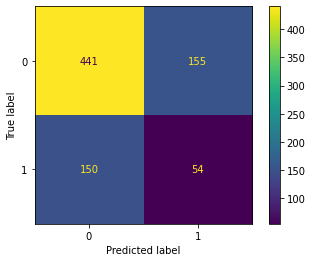

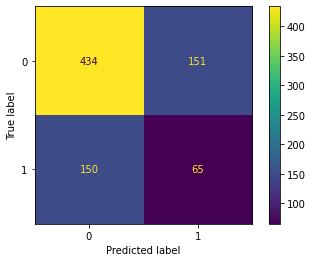

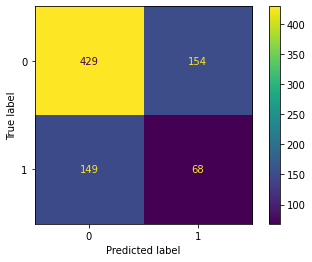

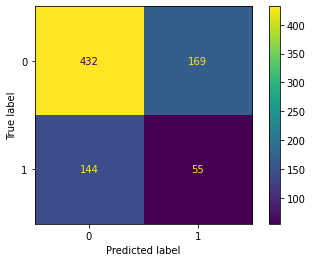

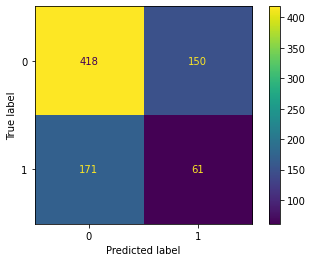

In [18]:
# Logistic Regression and Decision Tree

for train, test in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # Z-score continuous data
    zScore = StandardScaler()
    zScore.fit(X_train[['age', 'income_in_k', 
             'credit_score', 'num_credit_sources', 
             'utilization_rate']])
    
    X_train[['age', 'income_in_k', 
             'credit_score', 'num_credit_sources', 
             'utilization_rate']] = zScore.transform(X_train[['age', 
                                                              'income_in_k', 
                                                              'credit_score', 
                                                              'num_credit_sources', 
                                                              'utilization_rate']])
    X_test[['age', 'income_in_k',
            'credit_score', 'num_credit_sources', 
            'utilization_rate']] = zScore.transform(X_test[['age', 
                                                            'income_in_k', 
                                                            'credit_score',
                                                            'num_credit_sources',
                                                            'utilization_rate']])
    
    # create models
    model = lr.fit(X_train, y_train) 
    tree = DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    
    # record accuracy
    lr_acc.append(accuracy_score(y_test, model.predict(X_test)))
    tree_acc.append(tree.score(X_test,y_test))
    tree_depth.append(tree.get_depth())
    
    plot_confusion_matrix(tree,X_test,y_test)
    

In [ ]:
# 2. Evaluate your Models

Answer to #2 here